# Global Shark Attack Incidents   
---  
El objetivo de este proyecto es enfrentar un dataset de kaggle que cuenta con un cojunto de datos sobre   
[ataques de tiburones](https://www.kaggle.com/teajay/global-shark-attacks/version/1) que deberemos limpiar.  

La única imposición para el proyecto es declarar inicialmente una hipótesis en relación con el data set para,   
una vez limpios dichos datos, resolver dicha hipótesis.  

Hipótesis:
> Los ataques de tiburón es mayor causa de muerte en hombres que en mujeres.

In [4]:
# imports
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.pyplot import figure

In [78]:
# import dataset
df = pd.read_csv("../input/GSAF5.csv")
display(df.head())
display(df.shape)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


(5992, 24)

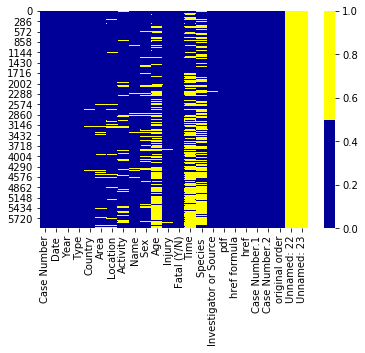

In [5]:
# missing data heatmap
cols = df.columns[:]
colours = ['#000099', '#ffff00'] # amarillo == missing data // azul == not missing data
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [90]:
# columns with data missing
df_miss = [col for col in df.columns if df[col].isnull().sum()[df[col].isnull().sum() > 0]]
df_miss = df[df_miss]

<ipython-input-90-0db48504c507>:1: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  df_miss = [col for col in df.columns if df[col].isnull().sum()[df[col].isnull().sum() > 0]]


In [97]:
# % and count of data missing
for col in df_miss:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {round(pct_missing*100)}% - {df[col].isnull().sum()} null(s)')

Country - 1.0% - 43 null(s)
Area - 7.0% - 402 null(s)
Location - 8.0% - 496 null(s)
Activity - 9.0% - 527 null(s)
Name - 3.0% - 200 null(s)
Sex  - 9.0% - 567 null(s)
Age - 45.0% - 2681 null(s)
Injury - 0.0% - 27 null(s)
Fatal (Y/N) - 0.0% - 19 null(s)
Time - 54.0% - 3213 null(s)
Species  - 49.0% - 2934 null(s)
Investigator or Source - 0.0% - 15 null(s)
href formula - 0.0% - 1 null(s)
href - 0.0% - 3 null(s)
Unnamed: 22 - 100.0% - 5991 null(s)
Unnamed: 23 - 100.0% - 5990 null(s)


In [ ]:
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', 
                                                                                y='num_missing')

Podemos observar como las columnas 'Unnamed: 22' y 'Unnamed: 23' contienen únicamente  
elementos nulos. Por otro lado, en las columnas 'Age', 'Time' y 'Species' predominan los   
elementos nulos frente a los elementos no nulos.  
Aunque no existe una solución acorde a cómo tratar la pérdida de datos, por ello lo mejor que podemos   
hacer es analizar los datos y decidir proporcionan o no información útil y/o relevante.

In [98]:
# drop null columns
data_missing = df[df['num_missing'] > 35].index
clean_data = df.drop(data_missing, axis=0)
clean_data

KeyError: 'num_missing'

##### Observo las columnas para determinar cuales de ellas pueden ser de mayor utilidad a la hora de encontrar respuesta a mi hipotesis

In [4]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

##### Tomo una selección previa de las columnas que creo que me aportarán la información adecuada:

In [5]:
col = ["Name", "Sex ", "Age", "Case Number", "Country", "Activity", "Species ", "Fatal (Y/N)"]
df_col = df[col]

##### Introduzco el límite temporal del que he hablado al comienzo (de 1900 a la actualidad):

In [6]:
year1900 = (df.Year >= 1900)
df_1900 = df_col[year1900]

##### A continuación, renombro algunas columnas con las que voy a trabajar por comodidad:

In [7]:
rename = {
    'Sex ' :'Sex',
    'Fatal (Y/N)': 'Fatal attack',
    'Species ': 'Shark info',
    'Case Number':'Day'
}

df_rename = df_1900.rename(columns = rename)

##### Una vez renombradas las columnas, compruebo si estas contienen valores nulos...

In [8]:
numnull = df_rename.isnull().sum()[df_rename.isnull().sum() > 0]
numnull

Name             158
Sex              505
Age             2103
Country           22
Activity         426
Shark info      2389
Fatal attack       9
dtype: int64

In [9]:
notnull = df_rename.isnull().sum()[df_rename.isnull().sum() == 0]
notnull

Day    0
dtype: int64

##### ...y sustituyo los valores nulos que haya encontrado en cada columna por una etiqueta que advierta sobre la falta de datos:

In [10]:
# Sustituir valores nulos:

valores = {
    "Name":"Unknown name",
    "Sex":"Unidentified sex",
    "Age":"Unknown age",
    "Country":"Undetermined place",
    "Activity":"Undetermined activity",
    "Shark info":"Undetermined shark",
    "Fatal attack": "Unknown state"
}

df_rename.fillna(value = valores, inplace = True)

## LIMPIEZA DE DATOS

##### Tras ojear los datos, he encontrado un patrón que ocurre por igual en muchas de las columnas: mucha de la información viene acompañada de espacios, los cuales procedo a eliminar iterando en todas las columnas no numéricas:

In [12]:
for col in df_rename:
    df_rename[col] = df_rename[col].str.strip()

## COLUMNA NAME

##### Un patrón muy visto en la columna de Name es el uso de 'male' o 'female' cuando no se tiene la información del nombre real. Aunque no es el único patrón, si que es el que más casos contiene. 

##### -> Para limpiar el contenido, reemplazo 'male' y 'female' (junto a otro grupo de nombres que no hacen referencia al nombre real de la persona) por 'Unknown name'. 
##### -> Pudiendo utilizar .startswtih("male" o "female") finalmente me he decantado por  .replace para no repetir la misma función tantas veces como cambios quiera gestionar.

In [13]:
df_rename["Name"].replace({
    'male':'Unknown name', 
    'female':'Unknown name',
    'boy':'Unknown name',
    '2 males':'Unknown name',
    'girl':'Unknown name',
    'boat':'Unknown name',
    'Anonymous':'Unknown name',
    'child':'Unknown name',
    'Unidentified':'Unknown name',
    'a sailor':'Unknown name',
    '2 fishermen':'Unknown name',
    'black male':'Unknown name',
    'Unknown':'Unknown name',
    'sailor':'Unknown name',
    'Occupant: Ben Stratton':'Unknown name',
    'a native':'Unknown name'
}, inplace = True)

display(df_rename.Name.value_counts().head())

name = list(df_rename["Name"])

data_name = pd.DataFrame(name, columns = ["Name"])
data_name

Unknown name    730
dinghy            3
M.C.              3
fisherman         3
a soldier         3
Name: Name, dtype: int64

,Name
0,Unknown name
1,Chucky Luciano
2,Unknown name
3,Rory Angiolella
4,Unknown name
...,...
5319,Emil Uhlbrecht & unidentified person
5320,"skiff with Dr. William T. Healey, Dr. Henry Ca..."
5321,Charles Duck
5322,Emil A. Berndt


## COLUMNA SEX:

##### He usado nuevamente .replace para modificar contenido confuso y para mejorar la legibilidad del dataframe final:
##### -> He modificado la 'M' por 'Male' y la 'F' por 'Female'.
##### -> He sustituido 'N', '.' y 'lli' por 'Unidentified sex'.

In [14]:
df_rename["Sex"].replace({
    'N':'Unidentified sex', 
    '.':'Unidentified sex',
    'lli':'Unidentified sex'
}, inplace = True)

df_rename["Sex"].value_counts()

M                   4268
F                    548
Unidentified sex     508
Name: Sex, dtype: int64

In [15]:
df_rename["Sex"].replace({
    'M':'Male', 
    'F':'Female'
}, inplace = True)

display(df_rename["Sex"].value_counts())

sex = list(df_rename["Sex"])

data_sex = pd.DataFrame(sex, columns = ["Sex"])
data_sex

Male                4268
Female               548
Unidentified sex     508
Name: Sex, dtype: int64

,Sex
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
5319,Male
5320,Unidentified sex
5321,Male
5322,Male


## COLUMNA AGE:

##### Para la edad he utilizado regex:
##### -> re.search me ha ayudado a  encontrar coincidencias en el contenido de la columna con todas aquellas cifras de dos dígitos, o todas aquellas edades desconocidas con la etiqueta 'Unknown age'
##### -> Para el resto de contenido que no se guiaba por esos patrones, los he agregado como el dígito 0 que más adelante he modificado como 'Unknown age'

In [16]:
l_age = list(df_rename["Age"])

age = [] 

for e in l_age:
    if re.search(r'\d{1,2}', e):
        age.append(e)
    elif re.search(r'\bUnknown age\b', e):
        age.append(e)
    else:
        age.append(0)

display(df_rename.Age.value_counts().head())        

data_age = pd.DataFrame(age, columns = ["Age"])
data_age

Unknown age    2103
17              143
18              139
20              133
19              132
Name: Age, dtype: int64

,Age
0,16
1,36
2,43
3,Unknown age
4,Unknown age
...,...
5319,Unknown age
5320,Unknown age
5321,Unknown age
5322,Unknown age


## COLUMNA MONTHS:

##### La columna Months muestra unicamente el mes en el que ocurrio se registraron los datos, ya que el día no me aporta valor para la investigació y el año puedo conseguirlo mediante la columna year.
##### Al igual que en la columna anterior, he utidizado regex para poder limpiar de manera efectiva los datos de dicha columna:
##### -> He convertido en un alista la columna y a continuación he usado un .join para crear una string con todos los datos.
##### -> El siguiente paso ha sido utilizar .finall para crear una lista con los datos que contaran con el patrón utilizado.
##### -> Por último, he modificado con .replace el numero extraido por el nombre del mes que le pertenece.

In [19]:
day = list(df_rename["Day"])

days = ' '.join(day)

all_days = re.findall(r'\b\.\d{2}\.\b', days)

months = [day.strip(".") for day in all_days]

,Date
0,09
1,09
2,09
3,09
4,09
...,...
5318,07
5319,07
5320,01
5321,00


In [20]:
data_months = pd.DataFrame(months, columns = ["Months"])

data_months.replace({
    '00':'UNKNOWN',
    '01':'January',
    '02':'February',
    '03':'March',
    '04':'April',
    '05':'May',
    '06':'June',
    '07':'July',
    '08':'August',
    '09':'September',
    '10':'October',
    '11':'November',
    '12':'December'
}, inplace = True)

data_months

,Months
0,September
1,September
2,September
3,September
4,September
...,...
5318,July
5319,July
5320,January
5321,UNKNOWN


## COLUMNA COUNTRY:

##### En la columna de Country a bastado con:
##### -> Sustituir los valores nulos por 'Undetermined place'.
##### -> Limpiar los espacios en blanco.

In [21]:
df_rename.Country.value_counts().head()
country = list(df_rename["Country"])


data_country = pd.DataFrame(country, columns = ["Country"])
data_country

,Country
0,USA
1,USA
2,USA
3,AUSTRALIA
4,AUSTRALIA
...,...
5319,USA
5320,USA
5321,AUSTRALIA
5322,USA


## COLUMNA ACTIVITY:

##### En la columna Activity he sustituido los valores nulos por 'Undetermined activity'

In [22]:
df_rename.Activity.value_counts().head()

activity = list(df_rename["Activity"])

data_activity = pd.DataFrame(activity, columns = ["Activity"])
data_activity

,Activity
0,Surfing
1,Surfing
2,Surfing
3,Surfing
4,Surfing
...,...
5319,Hunting seashells
5320,
5321,"Standing, gathering oysters"
5322,Undetermined activity


## COLUMNA SHARK INFO:

##### Al igual que en la columna anterior, en Shark info he limpiado posibles espacios y sustituido los valores nulos por 'Undetermined shark'.

In [23]:
# SHARK INFO:
# -> Limpiar por especie.
# -> Limpiar pasando de pulgadas a metros.
# NaN == 'Undetermined shark'

df_rename["Shark info"].value_counts().head()
shark = list(df_rename["Shark info"])

data_shark = pd.DataFrame(shark, columns = ["Shark info"])
data_shark

,Shark info
0,Undetermined shark
1,Undetermined shark
2,Undetermined shark
3,Undetermined shark
4,2 m shark
...,...
5319,Undetermined shark
5320,Undetermined shark
5321,Undetermined shark
5322,Undetermined shark


## COLUMNA FATAL ATTACK:

##### En los datos de esta columna he realizado varias limpiezas:
##### -> He usado .replace para la modificación de nombres como 'UNKNOWN' a 'Unknown state' o 'Y' y 'F' como 'Fatal attack' con el objetivo de unificar los datos y mejorar la legibilidad de los mismos.

In [24]:
df_rename["Fatal attack"].replace({
    'N':'Not fatal attack', 
    'Y':'Fatal attack', 
    'UNKNOWN':'Unknown state', 
    'F':'Fatal attack'
}, inplace = True)

df_rename["Fatal attack"].value_counts()
fatal = list(df_rename["Fatal attack"])

data_fatal = pd.DataFrame(fatal, columns = ["Fatal attack"])
data_fatal

,Fatal attack
0,Not fatal attack
1,Not fatal attack
2,Not fatal attack
3,Not fatal attack
4,Not fatal attack
...,...
5319,Fatal attack
5320,Not fatal attack
5321,Not fatal attack
5322,Not fatal attack


## DATAFRAME DEFINITIVO:

##### Una vez terminada la limpieza de datos de las columnas que me van a ayudar a resolver mi hipótesis, he unificado dichos datos en un único dataframe

In [28]:
final_data = df_rename[["Name", "Sex", "Age", "Day", "Country", "Activity", "Shark info", "Fatal attack"]]

df_rename["Name"] = data_name
df_rename["Sex"] = data_sex
df_rename["Age"] = data_age
df_rename["Day"] = data_months
df_rename["Country"] = data_country
df_rename["Activity"] = data_activity
df_rename["Shark info"] = data_shark
df_rename["Fatal attack"] = data_fatal

final_data.head(50)

,Name,Sex,Age,Day,Country,Activity,Shark info,Fatal attack
0,Unknown name,Male,16,September,USA,Surfing,Undetermined shark,Not fatal attack
1,Chucky Luciano,Male,36,September,USA,Surfing,Undetermined shark,Not fatal attack
2,Unknown name,Male,43,September,USA,Surfing,Undetermined shark,Not fatal attack
3,Rory Angiolella,Male,Unknown age,September,AUSTRALIA,Surfing,Undetermined shark,Not fatal attack
4,Unknown name,Male,Unknown age,September,AUSTRALIA,Surfing,2 m shark,Not fatal attack
5,Unknown name,Unidentified sex,Unknown age,September,AUSTRALIA,Fishing,Undetermined shark,Not fatal attack
6,Unknown name,Male,60s,September,USA,Wading,3' to 4' shark,Not fatal attack
7,Unknown name,Female,51,September,USA,Swimming,"Tiger shark, 10?",Not fatal attack
8,David Jewell,Male,50,September,NEW CALEDONIA,Kite surfing,Undetermined shark,Fatal attack
9,Rylie Williams,Female,12,September,USA,Boogie boarding,Undetermined shark,Not fatal attack


## RESOLVIENDO LA HIPOTESIS :

In [31]:
hipotesis1 = final_data[(final_data["Sex"]== "Male") | (final_data["Sex"]== "Female")]
hipotesis1.head(50)

,Name,Sex,Age,Day,Country,Activity,Shark info,Fatal attack
0,Unknown name,Male,16,September,USA,Surfing,Undetermined shark,Not fatal attack
1,Chucky Luciano,Male,36,September,USA,Surfing,Undetermined shark,Not fatal attack
2,Unknown name,Male,43,September,USA,Surfing,Undetermined shark,Not fatal attack
3,Rory Angiolella,Male,Unknown age,September,AUSTRALIA,Surfing,Undetermined shark,Not fatal attack
4,Unknown name,Male,Unknown age,September,AUSTRALIA,Surfing,2 m shark,Not fatal attack
6,Unknown name,Male,60s,September,USA,Wading,3' to 4' shark,Not fatal attack
7,Unknown name,Female,51,September,USA,Swimming,"Tiger shark, 10?",Not fatal attack
8,David Jewell,Male,50,September,NEW CALEDONIA,Kite surfing,Undetermined shark,Fatal attack
9,Rylie Williams,Female,12,September,USA,Boogie boarding,Undetermined shark,Not fatal attack
10,Fraser Penman,Male,Unknown age,September,AUSTRALIA,Surfing,Undetermined shark,Not fatal attack
